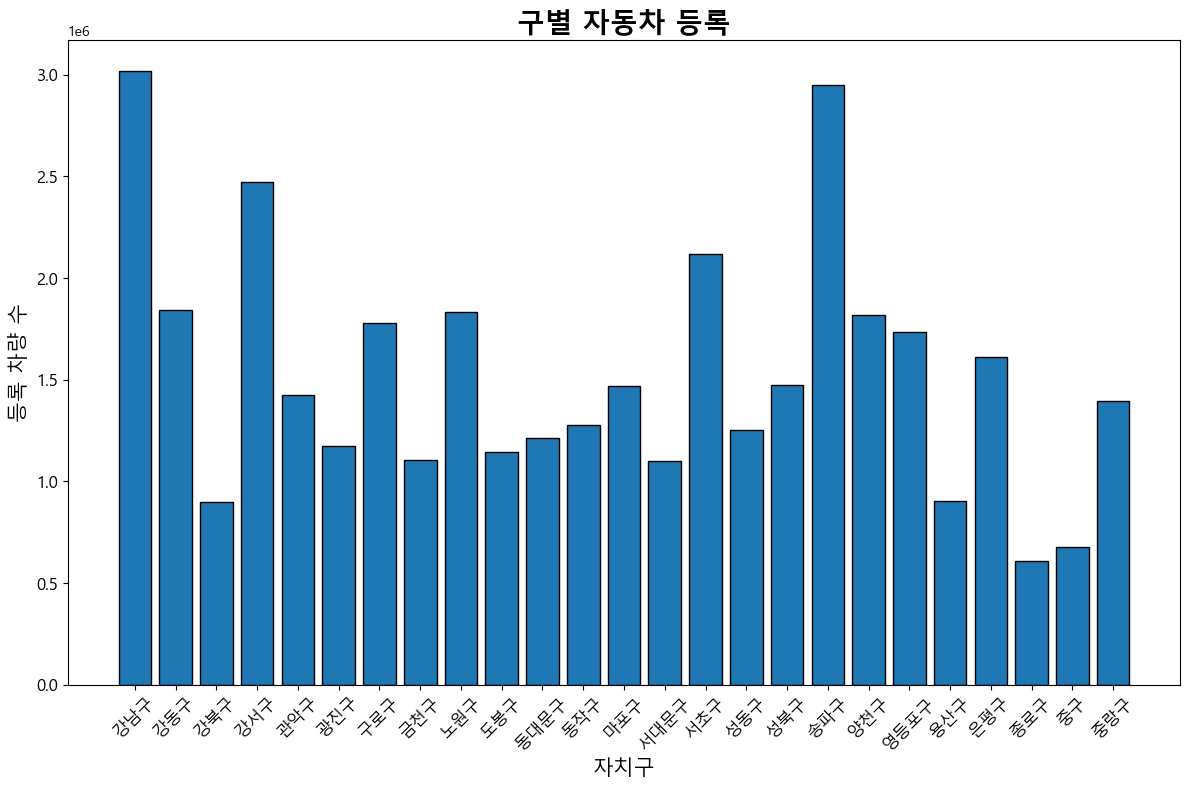

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
file_path = '23_구별_자동차등록.csv'
Type = pd.read_csv(file_path, encoding='utf-8')
Type['합'] = Type['합'].str.replace(',', '').astype(int)

# print(Type.head())

plt.figure(figsize=(12, 8))
plt.bar(Type['자치구별(2)'], Type['합'], edgecolor='black')
plt.title('구별 자동차 등록', fontsize=20, weight='bold')
plt.xlabel('자치구', fontsize=15)
plt.ylabel('등록 차량 수', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import folium
import json

csv_file_path = '23_구별_자동차등록.csv'
geojson_file_path = 'Seoul_Gu.json'
population_data = pd.read_csv(csv_file_path, encoding='utf-8')
population_data['합'] = (
    population_data['합']
    .fillna('0')  
    .astype(str)  
    .str.replace(',', '')
    .astype(float)  
)


district_population = population_data.groupby('코드')['합'].sum().reset_index()
district_population.rename(columns={'코드': 'SIG_CD', '합': 'population_density'}, inplace=True)

with open(geojson_file_path, 'r', encoding='EUC-KR') as file:
    geojson_data = json.load(file)

center = [37.541, 126.986]  # 서울 중심 좌표
m = folium.Map(location=center, zoom_start=11)

#구별 인구
folium.Choropleth(
    geo_data=geojson_data,
    data=district_population,
    columns=['SIG_CD', 'population_density'],
    key_on='properties.SIG_CD',
    fill_color='OrRd',
    legend_name='구별 화재 발생'
).add_to(m)

m.save('구별_자동차등록_히트맵_map.html')
m